Trabalho de Tópicos Especiais em Econometria 

Aluno: Gustavo Alovisi 1



Importação das bibliotecas:

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sqlite3
import statsmodels.tsa.stattools as smtsa
import statsmodels.graphics.tsaplots as tsaplots


Carregamento de dados através da API do Banco Central do Brasil. 
Foi carregada a Taxa de Inadimplência mensal em % e a média da taxa de juros mensal para operações de crédito no Brasil. 

In [6]:
jurosmedmensal= pd.read_csv('http://api.bcb.gov.br/dados/serie/bcdata.sgs.25433/dados?formato=csv',
                  sep = ';', encoding = 'utf-8', decimal = ',')
txinadimplencia = pd.read_csv  ('http://api.bcb.gov.br/dados/serie/bcdata.sgs.21082/dados?formato=csv',
                                sep = ';', encoding = 'utf-8', decimal = ',')


Exploração inicial dos dados: 

In [34]:
jurosmedmensal.head()

,data,valor
0,01/03/2011,2.05
1,01/04/2011,2.09
2,01/05/2011,2.08
3,01/06/2011,2.07
4,01/07/2011,2.08


In [11]:
txinadimplencia.head()


,data,valor
0,01/03/2011,3.18
1,01/04/2011,3.25
2,01/05/2011,3.37
3,01/06/2011,3.33
4,01/07/2011,3.42


Um pouco de data wrangling para juntar nossos dados em um único dataframe.

In [7]:
txinadimplencia.columns = ['data1', 'txinadimp']
jurosmedmensal.columns = ['data2', 'juros']
dataframe = [txinadimplencia, jurosmedmensal]
dataframe = pd.concat(dataframe, 1)
dataframe = dataframe.drop('data2', 1)
dataframe.head()


,data1,txinadimp,juros
0,01/03/2011,3.18,2.05
1,01/04/2011,3.25,2.09
2,01/05/2011,3.37,2.08
3,01/06/2011,3.33,2.07
4,01/07/2011,3.42,2.08


Criação de um banco de dados para nosso trabalho.

Com os dados carregados em uma dataframe do pandas, iremos salvar nossos dados em um banco de dados para o uso posterior, através da integração pandas-sqlite3 (.to_sql)
Utiliza-se o comando SQL "CREATE TABLE IF NOT EXISTS" para criar a tabela se ela já não existe no banco de dados.  

In [8]:
database = sqlite3.connect('dados.db')
c = database.cursor()
c.execute('''CREATE TABLE IF NOT EXISTS variaveis (data text, txjuros real, inadimplencia real)''')

#c.executemany('INSERT into variaveis VALUES (?,?,?)', dataframe)
dataframe.to_sql("variaveis", database, if_exists = 'replace') 


Carregando os dados do banco de dados local:

In [9]:
econvars = pd.read_sql_query("SELECT * FROM variaveis;", database)
econvars.head()

,index,data1,txinadimp,juros
0,0,01/03/2011,3.18,2.05
1,1,01/04/2011,3.25,2.09
2,2,01/05/2011,3.37,2.08
3,3,01/06/2011,3.33,2.07
4,4,01/07/2011,3.42,2.08


Análise Exploratória 

Printando o gráfico da série da taxa de juros em relação ao tempo e da inadimplência em relação ao tempo: 

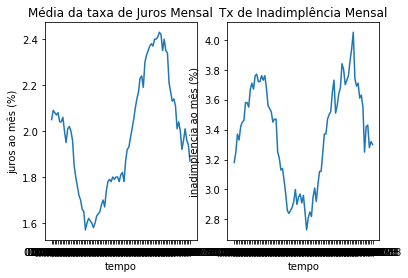

In [10]:
plt.subplot(121)
grafJuros = plt.plot(econvars.data1, econvars.juros)
plt.title('Média da taxa de Juros Mensal')
plt.xlabel("tempo")
plt.ylabel("juros ao mês (%)")

plt.subplot(122)
grafInadimplencia = plt.plot(econvars.data1, econvars.txinadimp)
plt.title("Tx de Inadimplência Mensal") 
plt.xlabel("tempo")
plt.ylabel("inadimplencia ao mês (%)")


plt.show()


Vamos agora printar um gráfico da correlação entre as séries e o valor da correlação: 

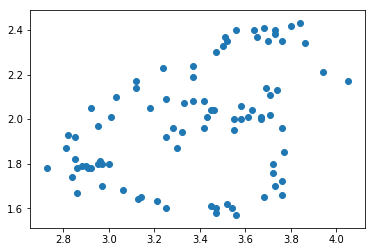

In [121]:
grafCorr = plt.scatter(econvars.txinadimp, econvars.juros)
plt.show() 

In [11]:
np.corrcoef(econvars.txinadimp, econvars.juros)

array([[ 1.        ,  0.41015367],
       [ 0.41015367,  1.        ]])

In [1]:


#jurosmedmensal['data'] = pd.to_datetime(jurosmedmensal['data'], format = '%d/%m/%Y')


#juros2 = pd.Series(data=jurosmedmensal['valor'], index=jurosmedmensal['data'])


#juros3 = pd.Series(jurosmedmensal.valor)
#juros3.head()

## Análise Econométrica: 

Para começar nossa modelagem de séries temporais seguindo a metodologia de Box and Jenkins, vamos testar a estacionariedade de nossas séries de dados. Para isso, iremos realizar um teste ADF para checar a presença de raiz unitária em nossas séries:

Para a taxa de inadimplência:

In [36]:
adf=smtsa.adfuller(econvars.txinadimp, regression=  'ctt') ## 'ctt' para checar a estacionariedade em tendência constante, linear e quadrática
adfoutput = pd.Series(adf[0:4], index = ["Estatística do Teste:", "P-valor", "# lags", "# observacoes"])
for key, value in adf[4].items():
        adfoutput['Critical Value ({})'.format(key)] = value
print(adfoutput)

Estatística do Teste:    -2.568067
P-valor                   0.530207
# lags                   12.000000
# observacoes            74.000000
Critical Value (1%)      -4.535093
Critical Value (5%)      -3.914770
Critical Value (10%)     -3.603837
dtype: float64


Para a taxa de juros: 

In [37]:
adf=smtsa.adfuller(econvars.juros, regression=  'ctt') ## 'ctt' para checar a estacionariedade em tendência constante, linear e quadrática
adfoutput = pd.Series(adf[0:4], index = ["Estatística do Teste:", "P-valor", "# lags", "# observacoes"])
for key, value in adf[4].items():
        adfoutput['Critical Value ({})'.format(key)] = value
print(adfoutput)

Estatística do Teste:    -1.590822
P-valor                   0.930455
# lags                   12.000000
# observacoes            74.000000
Critical Value (1%)      -4.535093
Critical Value (5%)      -3.914770
Critical Value (10%)     -3.603837
dtype: float64


Como ambos p-valores são maiores que p=0.05, não temos evidência suficiente que nos leve a rejeitar a hipótese nula de não-estacionariedade em nossas séries.

De forma visiual, vamos calcular a autocorrelação das séries: 

Primeiramente, da taxa de juros: 

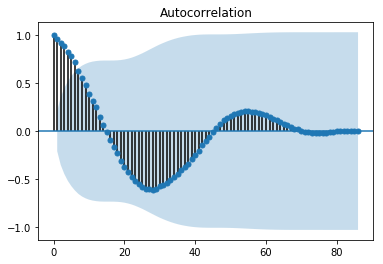

In [40]:
acf = tsaplots.plot_acf(econvars.txinadimp)

Da taxa de juros: 

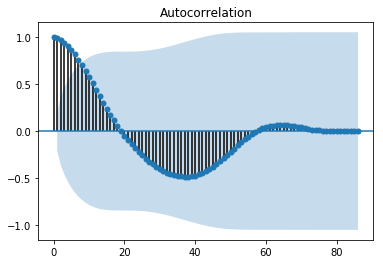

In [41]:
acf = tsaplots.plot_acf(econvars.juros)

Podemos claramente ver que ambas as séries possuem uma autocorrelação em t, o que atesta a não estacionariedade de ambas. 

Em seguida, iremos tornar as séries estacionárias ao diferenciá-las: 

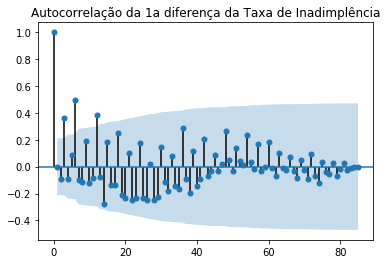

In [46]:
diff_inadimp = np.diff(econvars.txinadimp)
acf = tsaplots.plot_acf(diff_inadimp, alpha= 0.05,  title = "Autocorrelação da 1a diferença da Taxa de Inadimplência")

Notamos que a primeira diferença ainda exibe uma tendência na série da taxa de inadimplência. Para removê-la, tomaremos a segunda diferença da série: 

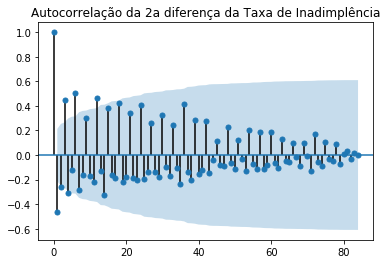

In [51]:
diff_diff_inadimp = np.diff(diff_inadimp)
acf = tsaplots.plot_acf(diff_diff_inadimp, alpha= 0.05,  title = "Autocorrelação da 2a diferença da Taxa de Inadimplência")

A série da segunda diferença da Taxa de Inadimplência é represenada no gráfico:

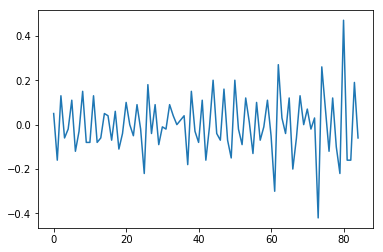

In [61]:
diff_diff_inadimp = pd.Series(diff_diff_inadimp)
grafdiff_diff_inadimp = plt.plot(diff_diff_inadimp)
plt.show()

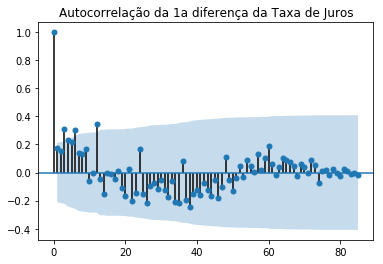

In [47]:
diff_juros = np.diff(econvars.juros)
acf = tsaplots.plot_acf(diff_juros, alpha= 0.05,  title = "Autocorrelação da 1a diferença da Taxa de Juros")

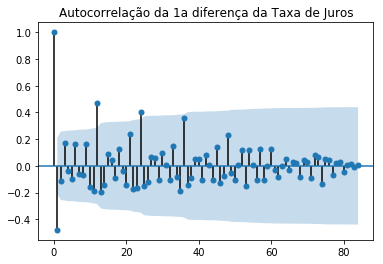

In [48]:
diff_diff_juros = np.diff(diff_juros)
acf = tsaplots.plot_acf(diff_diff_juros, alpha= 0.05,  title = "Autocorrelação da 1a diferença da Taxa de Juros")